In [1]:
# 1. csv 파일을 읽고 파티셔닝 해보기
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics 
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [4]:
df_adv = pd.read_csv('adv.csv', index_col=0)
print(df_adv.shape)

(200, 4)


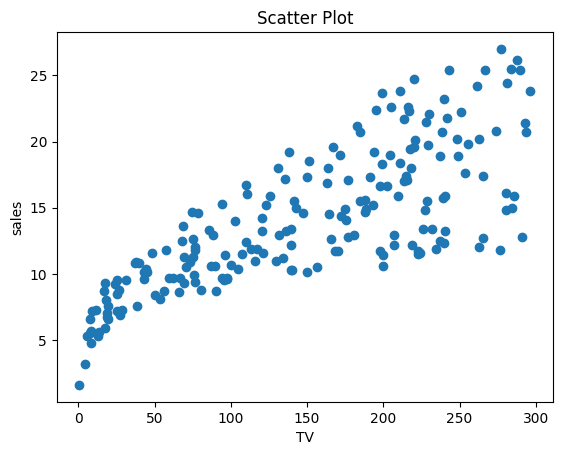

In [7]:
plt.scatter(df_adv.TV, df_adv.sales)
plt.title('Scatter Plot')
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()

In [8]:
X = df_adv.loc[:, ['TV']]
Y = df_adv['sales']
print(X.shape)

(200, 1)


In [9]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [11]:
# 2. 위의 X_train 과 Y_trainㅇ로 선형회귀모형만들기

In [12]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
regr.score(X_train, Y_train)

0.5736021199591975

In [13]:
regr.coef_

array([0.0464078])

In [15]:
# 3. 위의 모형에 X_test로 예측값 계산하고 실제 Y_test와 비교해 MSE를 구하고 결과 그리기
Y_pred = regr.predict(X_test)
np.mean((Y_pred - Y_test) ** 2)

np.float64(8.970991242413614)

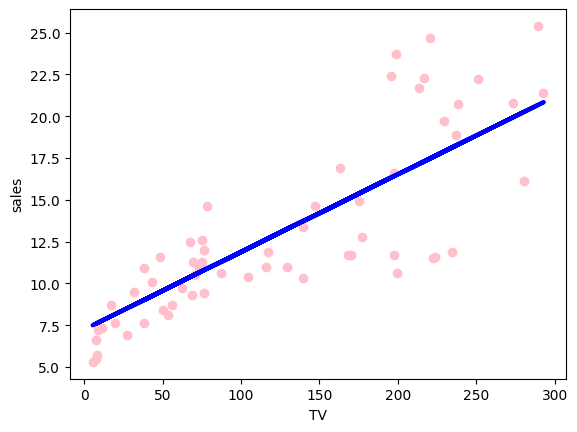

In [16]:
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()

In [17]:
# 4. 다음 데이터를 파티셔닝한 후 로지스틱 회귀모형을 피팅하기
df_credit = pd.read_csv('creditset.csv', index_col=0)
print(df_credit.shape)

(2000, 5)


In [19]:
X = df_credit.loc[:, ['income', 'age', 'loan']]
Y = df_credit['default10yr']
print(X.shape)

(2000, 3)


In [21]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [22]:
model = linear_model.LogisticRegression()
model.fit(X, Y)
model.coef_

array([[-2.43235035e-04, -3.49070376e-01,  1.73338206e-03]])

In [ ]:
# 5. Test 데이터로 모형의 성능 중 정분류율 구하기
Y_pred = model.predict(X_test)
Y_pred2 = [0 if x < 0.5 else 1 for x in Y_pred]
Y_pred3 = Y_pred2 == Y_test
np.mean(Y_pred3 == Y_test)
from sklearn.metrics import clas